# Assignment 2: Milestone I Natural Language Processing
## Task 2&3
#### Student Name: XXXX XXXX
#### Student ID: 000000

Date: XXXX

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include all the libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy

## Introduction
You should give a brief information of this assessment task here.

<span style="color: red"> Note that this is a sample notebook only. You will need to fill in the proper markdown and code blocks. You might also want to make necessary changes to the structure to meet your own needs. Note also that any generic comments written in this notebook are to be removed and replace with your own words.</span>

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import re
import os
import json
import string
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from collections import OrderedDict
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import gensim
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
 

C:\Users\abdul\.conda\envs\tf2x\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict
C:\Users\abdul\.conda\envs\tf2x\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Task 2. Generating Feature Representations for Job Advertisement Descriptions

...... Sections and code blocks on buidling different document feature represetations


<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

In [2]:
# Code to perform the task...
df = pd.read_csv('out/task1.df.csv', encoding='utf-8')
df.head()

,web_index,title,text,label
0,68802053,FP&A Blue Chip,market leading retail rapid growth and due exp...,Accounting_Finance
1,70757636,Part time Management Accountant,leading staff responsible production creating ...,Accounting_Finance
2,71356489,IFA EMPLOYED,purpose provide advice telephone lead supplied...,Accounting_Finance
3,69073629,Finance Manager,join expanding recruit aca qualified accountan...,Accounting_Finance
4,70656648,Management Accountant,offer interesting part qualified acca cima acc...,Accounting_Finance


In [3]:
def write_txt(vectorizer_df, method_num):
    file_name = 'out/count_vector{}.txt'.format(method_num)
    with open(file_name, 'w') as f:
        for index, row in vectorizer_df.iterrows():
            row_dict = row[1:].to_dict()
            filtered_dict = { key:value for (key,value) in row_dict.items() if value > 0}
            index = "#" + str(int(row['web_index']))

            f.write(index)
            f.write(",")
            f.writelines('{}:{},'.format(k,v) for k, v in filtered_dict.items())
            f.write("\n")

In [4]:
# count vectorizer (Bag of Words)
vectorizer1 = CountVectorizer(analyzer='word')
X = vectorizer1.fit_transform(list(df['text'].values.astype('U')))

vectorizer1_df = pd.DataFrame(X.toarray())
vectorizer1_df.insert(0, 'web_index', df['web_index'])
print(vectorizer1_df.shape)

(776, 3439)


In [5]:
# count vectorizer (TF-IDF)
vectorizer2 = TfidfVectorizer()
X = vectorizer2.fit_transform(list(df['text'].values.astype('U')))

vectorizer2_df = pd.DataFrame(X.toarray())
vectorizer2_df.insert(0, 'web_index', df['web_index'])
print(vectorizer1_df.shape)

(776, 3439)


In [6]:
text = df['text'].apply(lambda x: gensim.utils.simple_preprocess(str(x)))

w2v_model = gensim.models.Word2Vec(text,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

words = set(w2v_model.wv.index_to_key )
text_vec = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in text])

text_vec_avg = []
for v in text_vec:
    if v.size:
        text_vec_avg.append(v.mean(axis=0))
    else:
        text_vec_avg.append(np.zeros(100, dtype=float))
        
vectorizer3_df = pd.DataFrame(text_vec_avg)
vectorizer3_df.insert(0, 'web_index', df['web_index'])
print(vectorizer3_df.shape)

(776, 101)


### Saving outputs
Save the count vector representation as per spectification.
- count_vectors.txt

In [7]:
# code to save output data...
write_txt(vectorizer1_df, 1)
write_txt(vectorizer2_df, 2)
write_txt(vectorizer3_df, 3)

## Task 3. Job Advertisement Classification

...... Sections and code blocks on buidling classification models based on different document feature represetations. 
Detailed comparsions and evaluations on different models to answer each question as per specification. 

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

#### Classification with description vectors

In [8]:
# Code to perform the task...
label_df = df[['web_index', 'label']]
final_df1 = pd.merge(vectorizer2_df, label_df, on='web_index')

X = final_df1.iloc[:,1:-1]
y = final_df1['label']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Training Accuracy of the RF model with 5 cross fold 0.6487770809136663
Training Accuracy of the KNN model with 5 cross fold 0.7371735191637631
Training Accuracy of the LR model with 5 cross fold 0.7725701897018971
Training Accuracy of the NB model with 5 cross fold 0.6935166860240031
Training Accuracy of the GB model with 5 cross fold 0.67606968641115


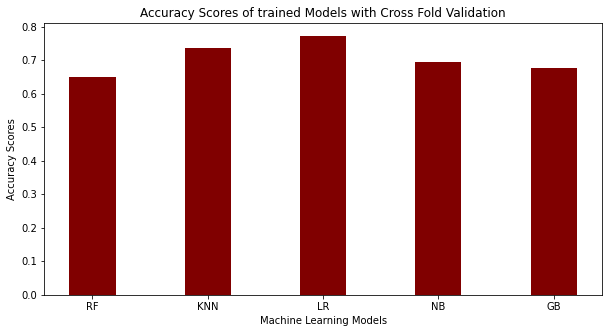

In [9]:
accuracy_scores = []
models = ['RF', 'KNN', 'LR', 'NB', 'GB']

RF = RandomForestClassifier()
scores = cross_val_score(RF, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the RF model with 5 cross fold {}".format(sum(scores)/len(scores)))

neighbors_clf = KNeighborsClassifier(n_neighbors=5,)
scores = cross_val_score(neighbors_clf, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the KNN model with 5 cross fold {}".format(sum(scores)/len(scores)))

lr_clf = LogisticRegression(random_state=0)
scores = cross_val_score(lr_clf, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the LR model with 5 cross fold {}".format(sum(scores)/len(scores)))

NB_classifier = GaussianNB()
scores = cross_val_score(NB_classifier, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the NB model with 5 cross fold {}".format(sum(scores)/len(scores)))

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
scores = cross_val_score(gb_clf, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the GB model with 5 cross fold {}".format(sum(scores)/len(scores)))

fig = plt.figure(figsize = (10, 5))
plt.bar(models, accuracy_scores, color ='maroon',
        width = 0.4)
 
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Scores")
plt.title("Accuracy Scores of trained Models with Cross Fold Validation")
plt.show()

#### classification with title vectors

In [10]:
vectorizer2 = TfidfVectorizer()
X = vectorizer2.fit_transform(list(df['title'].values.astype('U')))

title_vectorizer1_df = pd.DataFrame(X.toarray())
title_vectorizer1_df.insert(0, 'web_index', df['web_index'])
print(title_vectorizer1_df.shape)
   
label_df = df[['web_index', 'label']]
final_df2 = pd.merge(title_vectorizer1_df, label_df, on='web_index')

X = final_df2.iloc[:,1:-1]
y = final_df2['label']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=123)

(776, 986)


Training Accuracy of the RF model with 5 cross fold 0.7544384049554782
Training Accuracy of the KNN model with 5 cross fold 0.7902488579171507
Training Accuracy of the LR model with 5 cross fold 0.824072164150213
Training Accuracy of the NB model with 5 cross fold 0.7098276422764227
Training Accuracy of the GB model with 5 cross fold 0.7515868370112273


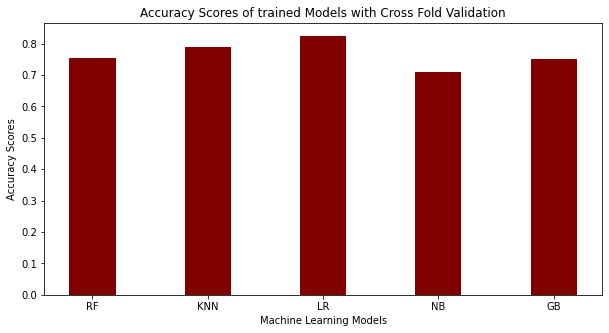

In [11]:
accuracy_scores = []
models = ['RF', 'KNN', 'LR', 'NB', 'GB']

RF = RandomForestClassifier()
scores = cross_val_score(RF, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the RF model with 5 cross fold {}".format(sum(scores)/len(scores)))

neighbors_clf = KNeighborsClassifier(n_neighbors=5,)
scores = cross_val_score(neighbors_clf, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the KNN model with 5 cross fold {}".format(sum(scores)/len(scores)))

lr_clf = LogisticRegression(random_state=0)
scores = cross_val_score(lr_clf, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the LR model with 5 cross fold {}".format(sum(scores)/len(scores)))

NB_classifier = GaussianNB()
scores = cross_val_score(NB_classifier, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the NB model with 5 cross fold {}".format(sum(scores)/len(scores)))

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
scores = cross_val_score(gb_clf, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the GB model with 5 cross fold {}".format(sum(scores)/len(scores)))

fig = plt.figure(figsize = (10, 5))
plt.bar(models, accuracy_scores, color ='maroon',
        width = 0.4)
 
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Scores")
plt.title("Accuracy Scores of trained Models with Cross Fold Validation")
plt.show()

#### classification with title and description vectors

In [12]:
final_df2 = final_df2.drop('label', axis=1)
final_df = pd.merge(final_df2, final_df1, on='web_index')

X = final_df.iloc[:,1:-1]
y = final_df['label']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=123)


Training Accuracy of the RF model with 5 cross fold 0.7451995354239257
Training Accuracy of the KNN model with 5 cross fold 0.8161096399535424
Training Accuracy of the LR model with 5 cross fold 0.8804775842044135
Training Accuracy of the NB model with 5 cross fold 0.8062894308943089
Training Accuracy of the GB model with 5 cross fold 0.7903008904374758


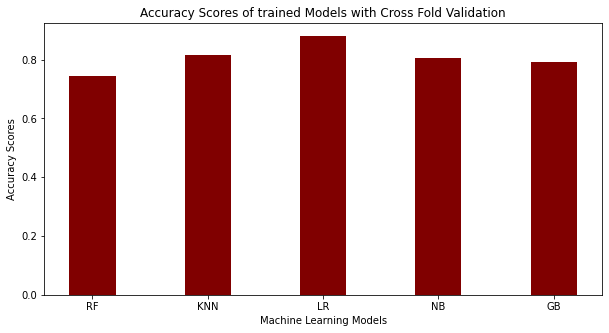

In [13]:
accuracy_scores = []
models = ['RF', 'KNN', 'LR', 'NB', 'GB']

RF = RandomForestClassifier()
scores = cross_val_score(RF, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the RF model with 5 cross fold {}".format(sum(scores)/len(scores)))

neighbors_clf = KNeighborsClassifier(n_neighbors=5,)
scores = cross_val_score(neighbors_clf, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the KNN model with 5 cross fold {}".format(sum(scores)/len(scores)))

lr_clf = LogisticRegression(random_state=0)
scores = cross_val_score(lr_clf, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the LR model with 5 cross fold {}".format(sum(scores)/len(scores)))

NB_classifier = GaussianNB()
scores = cross_val_score(NB_classifier, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the NB model with 5 cross fold {}".format(sum(scores)/len(scores)))

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
scores = cross_val_score(gb_clf, X_train, y_train, cv=5)
accuracy_scores.append(sum(scores)/len(scores))
print("Training Accuracy of the GB model with 5 cross fold {}".format(sum(scores)/len(scores)))

fig = plt.figure(figsize = (10, 5))
plt.bar(models, accuracy_scores, color ='maroon',
        width = 0.4)
 
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Scores")
plt.title("Accuracy Scores of trained Models with Cross Fold Validation")
plt.show()

## Summary
With the vectors of title and description, each model perform well compare to seperatly train on the title and description vector.

Resultantly, we can say that more information of word increase the performance of the model and Logistic Regression model outer perform relative to other trained models.